# The Probability Density Function - Lab

## Introduction
In this lab, we will look at building visualizations known as **density plots** to estimate the probability density for a given set of data. 

## Objectives

You will be able to:

* Calculate the PDF from a given dataset containing real-valued random variables
* Plot density functions and comment on the shape of the plot
* Plot density functions using seaborn

## Let's get started

Let's import the necessary libraries for this lab.

In [9]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd 
df = pd.read_csv('weight-height.csv')

In [10]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


## Import the data, and calculate the mean and the standard deviation

- Import the dataset 'weight-height.csv' as a pandas dataframe.

- Next, calculate the mean and standard deviation for weights and heights for men and women individually. You can simply use the pandas `.mean()` and `.std()` to do so.

**Hint**: Use your pandas dataframe subsetting skills like loc(), iloc() and groupby()

In [15]:

male_df =  df.loc[df['Gender']=='Male']
female_df =  df.loc[df['Gender']=='Female']

print('Male Height mean:', male_df.Height.mean())
print("Male Height sd:",  male_df.Height.std())
print('Male Weight mean:',  male_df.Weight.mean())
print('Male Weight std:',  male_df.Weight.std())
print('Female Height mean:', female_df.Height.mean())
print("Female Height sd:",  female_df.Height.std())
print('Female Weight mean:',  female_df.Weight.mean())
print('Female Weight std:',  female_df.Weight.std())
# Male Height mean: 69.02634590621737
# Male Height sd: 2.8633622286606517
# Male Weight mean: 187.0206206581929
# Male Weight sd: 19.781154516763813
# Female Height mean: 63.708773603424916
# Female Height sd: 2.696284015765056
# Female Weight mean: 135.8600930074687
# Female Weight sd: 19.022467805319007

Male Height mean: 69.02634590621741
Male Height sd: 2.863362228660647
Male Weight mean: 187.0206206581932
Male Weight std: 19.7811545167638
Female Height mean: 63.70877360342507
Female Height sd: 2.696284015765054
Female Weight mean: 135.86009300746835
Female Weight std: 19.022467805319028


## Plot histograms (with densities on the y-axis) for male and female heights 

- Make sure to create overlapping plots
- use binsize = 10, set alpha level so that overlap can be visualized

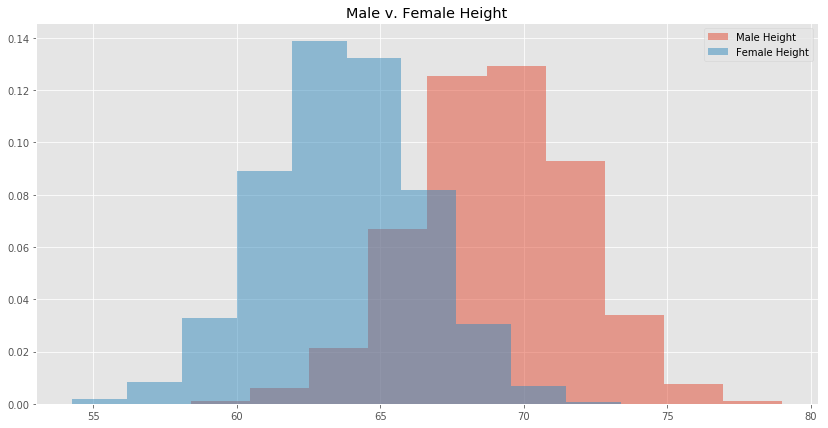

In [21]:
fig = plt.figure( figsize=(14,7))

bins = 10
plt.hist(male_df.Height, bins, alpha=0.5, label='Male Height', density=True)
plt.hist(female_df.Height, bins, alpha=0.5, label='Female Height', density=True)
plt.legend(loc='upper right')
plt.title("Male v. Female Height")
plt.show()



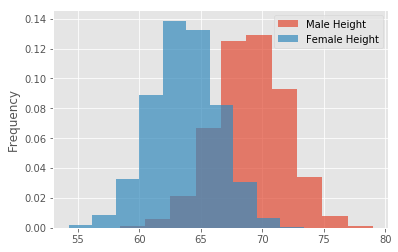

In [17]:
# Your code here

In [18]:
# Record your observations - are these inline with your personal observations?


## Create a density function using interpolation


- Write a densit function density() that uses interpolation and takes in a random variable
- Use`np.hist`
- The function should return two lists carrying x and y coordinates for plotting the density function

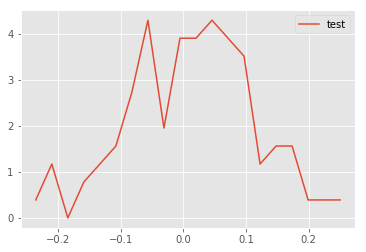

In [30]:
def density(x):
    
    n, bins = np.histogram(x, 20, density=1)
    pdfx = np.zeros(n.size)
    pdfy = np.zeros(n.size)
    for k in range(n.size):
        pdfx[k] = 0.5*(bins[k]+bins[k+1])
        pdfy[k] = n[k]
    return pdfx, pdfy
# Generate test data and test the function - uncomment to run the test
np.random.seed(6)
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 100)
x,y = density(s)
plt.plot(x,y, label = 'test')
plt.legend()

## Add Overlapping density plots to the histograms plotted earlier

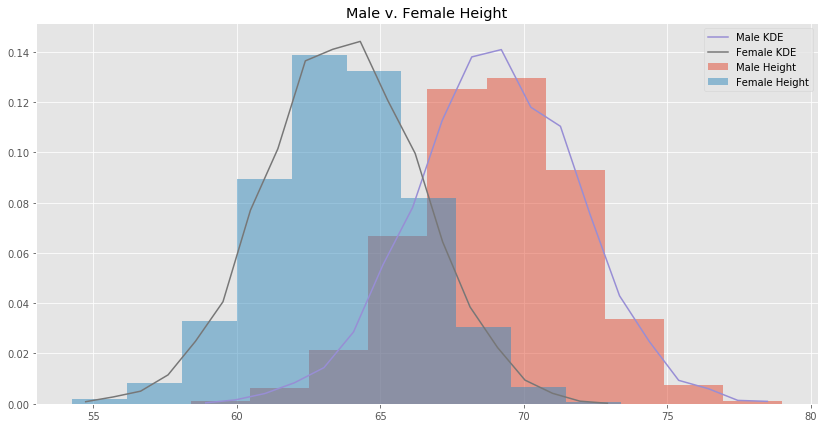

In [36]:
fig = plt.figure( figsize=(14,7))

bins = 10
plt.hist(male_df.Height, bins, alpha=0.5, label='Male Height', density=True)
plt.hist(female_df.Height, bins, alpha=0.5, label='Female Height', density=True)
xm, ym = density(male_df.Height)
xf, yf = density(female_df.Height)
plt.plot(xm, ym, label="Male KDE")
plt.plot(xf, yf, label="Female KDE")
plt.legend(loc='upper right')
plt.title("Male v. Female Height")
plt.show()# You code here 

## Repeat above exerice for male and female weights

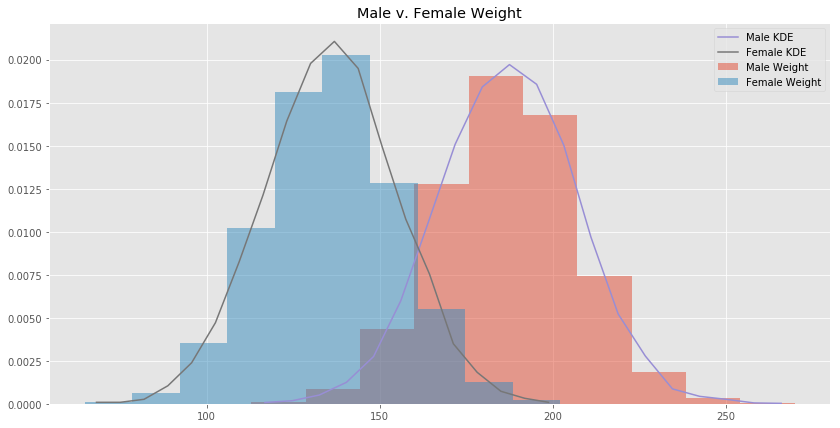

In [37]:
fig = plt.figure( figsize=(14,7))

bins = 10
plt.hist(male_df.Weight, bins, alpha=0.5, label='Male Weight', density=True)
plt.hist(female_df.Weight, bins, alpha=0.5, label='Female Weight', density=True)
xm, ym = density(male_df.Weight)
xf, yf = density(female_df.Weight)
plt.plot(xm, ym, label="Male KDE")
plt.plot(xf, yf, label="Female KDE")
plt.legend(loc='upper right')
plt.title("Male v. Female Weight")
plt.show()# Your code here 

## Write your observations in the cell below

In [25]:
# Record your observations - are these inline with your personal observations?


# What is the takeaway when comparing male and female heights and weights?

## Repeat Above experiments in seaborn and compare with your results

/Users/Allie/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


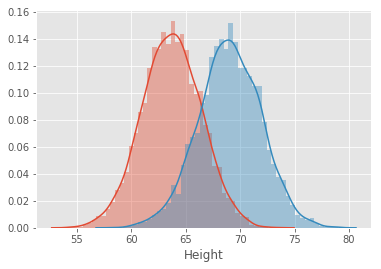

In [41]:
import seaborn as sns
sns.distplot(female_df.Height)
sns.distplot(male_df.Height);# Code for heights here

/Users/Allie/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


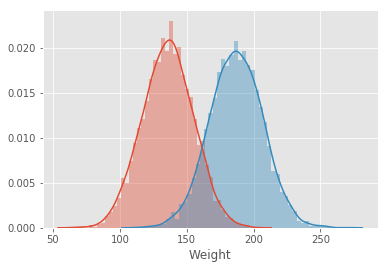

In [42]:
import seaborn as sns
sns.distplot(female_df.Weight)
sns.distplot(male_df.Weight);# Code for weights here

In [11]:
# Your comments on the two approaches here. 
# are they similar? what makes them different if they are?

## Summary

In this lesson you learned how to build the probability density curves visually for a given datasets, and compare the distributions visually by looking at the spread, center and overlap. This is a useful EDA technique and can be used to answer some initial questions before embarking on a complex analytics journey.